## Table of Contents

- [1. Introduction and Data Preprocessing](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 Packages](#1.2)
    - [1.3 Read or Import](#1.3)
    - [1.4 Data Summary](#1.4)
    - [1.5 Data Preparation](#1.5)
- [2. Exploratory Data Analysis](#2)
    - [2.1 Target Variable](#2.1)
    - [2.2 Features Correlation with Target](#2.2)
    - [2.3 Feature Variable](#2.3)
        - [2.3.1 Alcohol](#2.3.1)
        - [2.3.2 Volatile Acidity](#2.3.2)
        - [2.3.3 Residual Sugar](#2.3.3)
    - [2.4 Multicollinearity](#2.4)
- [3. Feature Engineering](#3)
    - [3.1 Missing Values](#3.1)
- [4. Model](#4)
    - [4.1 Logistic Regression](#4.1)
    - [4.2 Random Forest](#4.2)
- [5. Conclusion](#5)

# UNDER REVIEW...

<a name='1'></a>
# 1. Introduction and Data Preprocessing

<a name='1.1'></a>
## 1.1 Problem Statement

There are two common types of wine, white wine and red wine. In this case we got the red wine data from Kaggle. We want to predict the red wine quality based on many variables.

<a name='1.2'></a>
## 1.2 Packages

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

<a name='1.3'></a>
## 1.3 Read or Import

In [3]:
df = pd.read_csv("winequality-red.csv")

<a name='1.4'></a>
## 1.4 Data Summary

Now we want to count the variables

There are 12 variables in total, 11 features or independent variables and 1 target or dependent variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All of the variables are numerical

All features are numerical and float. After further analysis we could conclude that all the features are continuous variables. So we want to predict categorical (ordinal) variable with 11 continuous variables

In [5]:
numCols = list(df.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 12 numerical features:
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [6]:
catCols = list(df.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} categorical features:\n", catCols)

There are 0 categorical features:
 []


<a name='1.5'></a>
## 1.5 Data Preparation

There are two methods that we could use to seperate and split the data. To make the code easier, I want to split the data first become the training and testing data and then split each data into features and target data later.

In [7]:
# Seperate first then split (A)
# Seperate features and target variable
X = df.drop(['quality'], axis=1)
y = df.quality

#Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=None,  
                                   test_size=0.20,  
                                   shuffle=True)

In [8]:
# Split first then separate (B)
# Split the train and test data
dftrain, dftest = train_test_split(df, 
                                   random_state=None,  
                                   test_size=0.20,  
                                   shuffle=True)

# Seperate features and target variable
X_train = dftrain.drop(['quality'], axis=1)
y_train = dftrain.quality
X_test = dftest.drop(['quality'], axis=1)
y_test = dftest.quality

In [9]:
#80/20 split
print(f'X_train: {X_train.shape} ({round(len(X_train)/len(df), 1) * 100}%)')
print(f'y_train: {y_train.shape} ({round(len(y_train)/len(df), 1) * 100}%)')
print(f'X_test: {X_test.shape} ({round(len(X_test)/len(df), 1) * 100}%)')
print(f'y_test: {y_test.shape} ({round(len(y_test)/len(df), 1) * 100}%)')

#Data preview
print('')
print('')
print('X_train: ')
print(X_train.head(3))
print('')
print('y_train: ')
print(y_train.head(3))

X_train: (1279, 11) (80.0%)
y_train: (1279,) (80.0%)
X_test: (320, 11) (20.0%)
y_test: (320,) (20.0%)


X_train: 
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1037            7.3              0.91         0.10             1.8      0.074   
410             9.0              0.43         0.34             2.5      0.080   
544            14.3              0.31         0.74             1.8      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1037                 20.0                  56.0  0.99672  3.35       0.56   
410                  26.0                  86.0  0.99870  3.38       0.62   
544                   6.0                  15.0  1.00080  2.86       0.79   

      alcohol  
1037      9.2  
410       9.5  
544       8.4  

y_train: 
1037    5
410     6
544     6
Name: quality, dtype: int64


<a name='2'></a>
# 2. Exploratory Data Analysis

<a name='2.1'></a>
## 2.1 Target Variable

<Figure size 576x432 with 0 Axes>

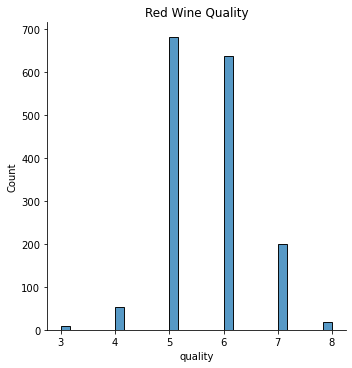

In [10]:
plt.figure(figsize=(8,6))
sns.displot(y)
title = plt.title("Red Wine Quality")

#As we can see the distribution gathered in the middle
#5 Quality value shows as the most quality value in red wine distribution followed by 6

## 2.2 Features Correlation with Target

In [11]:
# Top 10 highest pearson correlation
corr_mat = dftrain.corr().quality.sort_values(ascending=False)
corr_mat.head(12)

quality                 1.000000
alcohol                 0.481714
sulphates               0.237361
citric acid             0.215434
fixed acidity           0.124891
residual sugar          0.008265
pH                     -0.045433
free sulfur dioxide    -0.056288
chlorides              -0.135251
density                -0.180917
total sulfur dioxide   -0.190007
volatile acidity       -0.376280
Name: quality, dtype: float64

In [12]:
# Seems like the alcohol has the highest positive correlation with quality, the higher the alcohol the higher the quality
# On the other hand the volatile acidity has highest negative correlation with quality, the higher the volatile acidity the lower the quality
# Lets look deeper into these variables

<a name='2.3'></a>
## 2.3 Feature Variables

Here is a deeper analysis with the highest, lowest, and closest to zero variables

<a name='2.3.1'></a>
### 2.3.1 Alcohol

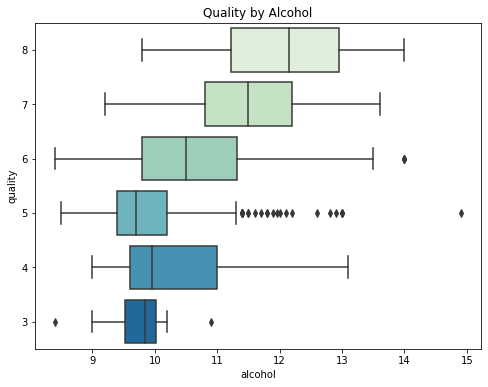

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='alcohol', y='quality', data=dftrain, orient='h', order=[8,7,6,5,4,3], palette='GnBu')
title = plt.title('Quality by Alcohol')

# It seems like the 

<a name='2.3.2'></a>
### 2.3.2 Volatile Acidity

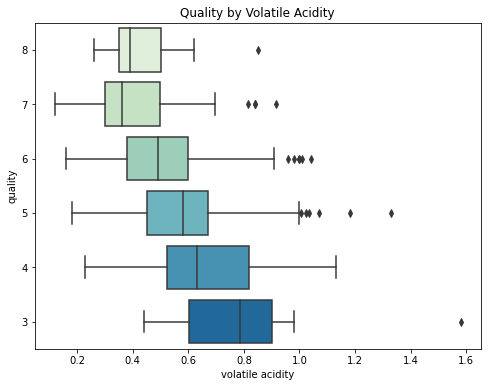

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='volatile acidity', y='quality', data=dftrain, orient='h', order=[8,7,6,5,4,3], palette='GnBu')
title = plt.title('Quality by Volatile Acidity')
# As we can see

<a name='2.3.3'></a>
### 2.3.3 Residual Sugar

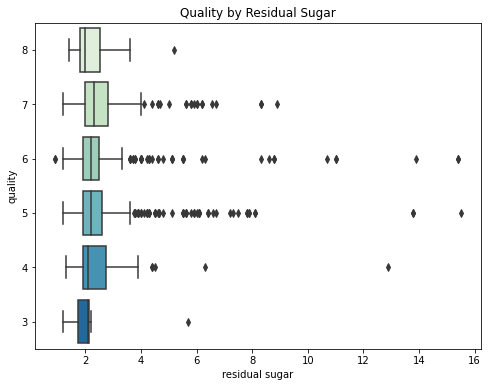

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='residual sugar', y='quality', data=dftrain, orient='h', order=[8,7,6,5,4,3], palette='GnBu')
title = plt.title('Quality by Residual Sugar')
# The data is hard to see because the outliers, now lets try to hide the outliers

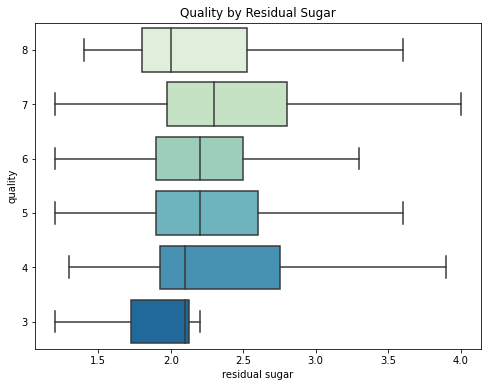

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='residual sugar', y='quality', data=dftrain, orient='h', order=[8,7,6,5,4,3], showfliers = False, palette='GnBu')
title = plt.title('Quality by Residual Sugar')
# As we can see

<a name='2.4'></a>
## 2.4 Multicollinearity

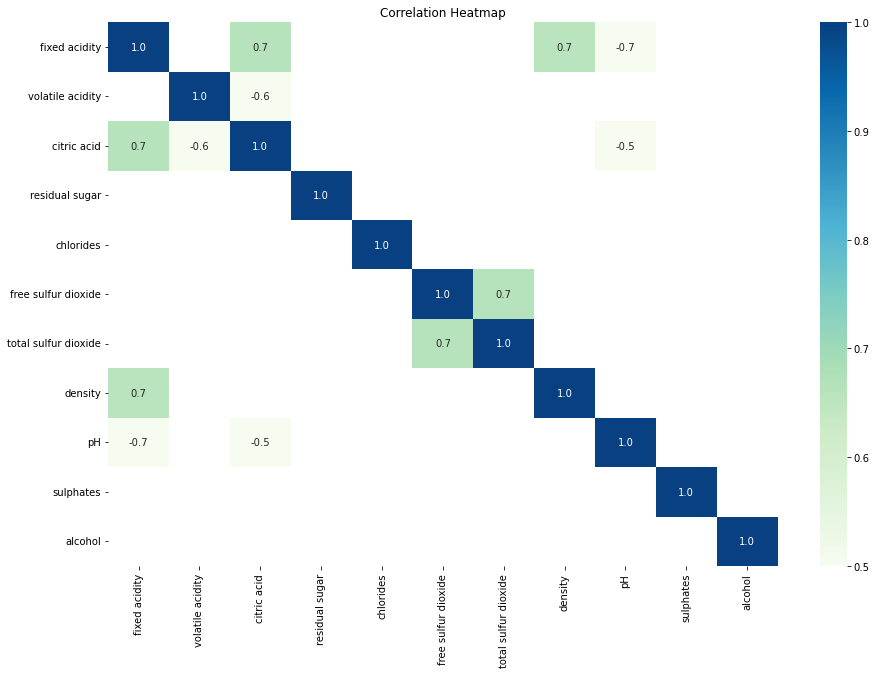

In [17]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = dftrain.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

<a name='3'></a>
# 3. Feature Engineering

<a name='3.1'></a>
## 3.1 Missing Values

In [18]:
missing_data_train_count = X_train.isnull().sum()
missing_data_train_percent = X_train.isnull().sum() / len(X) * 100

missing_data_train = pd.DataFrame({
    'Count': missing_data_train_count,
    'Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train.Count > 0]
missing_data_train.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_train.head(15)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


In [19]:
missing_data_test_count = X_test.isnull().sum()
missing_data_test_percent = X_test.isnull().sum() / len(X) * 100

missing_data_test = pd.DataFrame({
    'Count': missing_data_test_count,
    'Percent': missing_data_test_percent
})
missing_data_test = missing_data_test[missing_data_test.Count > 0]
missing_data_test.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_test.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_test.head(10)

There are 0 features having missing data.

Top 10 missing value features:


,Count,Percent


In [20]:
# Dealing with outliers, missing value
# feature engineering

<a name='4'></a>
# 4. Model

In [21]:
# Possible algorithms that we could use to predict categorical (ordinal) variable with 11 continuous variables
# 1. Multivariate Logistic Regression
# 2. Random Forest

<a name='4.1'></a>
## 4.1 Multinomial Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score (Train):",accuracy_score(y_train,Y_train_pred))
print("Confusion Matrix (Train) \n",confusion_matrix(y_test,Y_test_pred))
print("Accuracy Score (Test):",accuracy_score(y_test,Y_test_pred))
print("Confusion Matrix (Test) \n",confusion_matrix(y_test,Y_test_pred))

Accuracy Score (Train): 0.5840500390930414
Confusion Matrix (Train) 
 [[  0   0   2   0   0   0]
 [  0   0  10   1   0   0]
 [  0   0 101  23   0   0]
 [  0   0  50  87   1   0]
 [  0   0   3  39   1   0]
 [  0   0   0   1   1   0]]
Accuracy Score (Test): 0.590625
Confusion Matrix (Test) 
 [[  0   0   2   0   0   0]
 [  0   0  10   1   0   0]
 [  0   0 101  23   0   0]
 [  0   0  50  87   1   0]
 [  0   0   3  39   1   0]
 [  0   0   0   1   1   0]]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<a name='4.2'></a>
## 4.2 Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score (Train):",accuracy_score(y_train,y_train_pred2))
print("Confusion Matrix (Train) \n",confusion_matrix(y_train,y_train_pred2))
print("Accuracy Score (Test):",accuracy_score(y_test,y_test_pred2))
print("Confusion Matrix (Test) \n",confusion_matrix(y_test,y_test_pred2))

Accuracy Score (Train): 1.0
Confusion Matrix (Train) 
 [[  8   0   0   0   0   0]
 [  0  42   0   0   0   0]
 [  0   0 557   0   0   0]
 [  0   0   0 500   0   0]
 [  0   0   0   0 156   0]
 [  0   0   0   0   0  16]]
Accuracy Score (Test): 0.7
Confusion Matrix (Test) 
 [[  0   0   2   0   0   0]
 [  0   0   8   3   0   0]
 [  0   0 101  23   0   0]
 [  0   0  31 100   7   0]
 [  0   0   3  16  23   1]
 [  0   0   0   0   2   0]]


<a name='4.3'></a>
## 4.3 Neural Network

Hyperparameter:
Layer = 3
Nodes = (5, 10, 6)
Alpha = 0.01

In [43]:
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [ ]:
# Convert pandas dataframe to numpy (array)
X_train_a = X_train.T.to_numpy()
y_train_a = y_train.T.to_numpy()

<a name='5'></a>
# 5. Conclusion

As we can see that random forest algorithm makes the best prediction with the accuracy of 0.70625. It means that the algorithm guessed the test data accuracy right 70.6 % of the time